In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from PIL import Image
 

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = tf.convert_to_tensor(x_train/255., tf.float32)
x_test = tf.convert_to_tensor(x_test/255., tf.float32)
 
batchsz = 100
train_db = tf.data.Dataset.from_tensor_slices(x_train)
test_db = tf.data.Dataset.from_tensor_slices(x_test)
 
train_db = train_db.shuffle(batchsz*5).batch(batchsz).repeat(10)
test_db = test_db.batch(batchsz)
 

class AE(keras.Model):
    def __init__(self):
        super(AE, self).__init__()
 
                 # Create Encoders network
        self.encoder = keras.Sequential([
                         keras.layers.Dense(256, activation=tf.nn.relu), # parameter quantity 784*256+256
                         keras.layers.Dense(128, activation=tf.nn.relu), # parameter amount 256*128+128
                         keras.layers.Dense(20) # Parameter 128*20+20
        ])
 
                 # Create Decoders network
        self.decoder = keras.Sequential([
                         keras.layers.Dense(128, activation=tf.nn.relu), # parameter amount 20*128+128
                         keras.layers.Dense(256, activation=tf.nn.relu), # parameter 128*256+256
                         keras.layers.Dense(784) # parameter amount 256*784+784
        ])
 
    def call(self, inputs, training=None):
            # Forward propagation
            # Code to get the hidden vector h
        h = self.encoder(inputs)
            # Decode to get reconstructed picture
        out = self.decoder(h)
        return out

    
model = AE()
model.build(input_shape=(None,784))
model.summary()
 
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
 
for step, x in enumerate(train_db):
    x = tf.reshape(x,[-1,784])
    with tf.GradientTape() as tape:
        xx = model(x)
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=x, logits=xx)
        loss = tf.reduce_mean(loss)
 
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
 
    if step%100 == 0:
        print(step, 'loss: ', float(loss))



Model: "ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 20)                236436    
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               237200    
Total params: 473,636
Trainable params: 473,636
Non-trainable params: 0
_________________________________________________________________
0 loss:  0.6938802599906921
100 loss:  0.3446640372276306
200 loss:  0.32970893383026123
300 loss:  0.3099933862686157
400 loss:  0.29585906863212585
500 loss:  0.29229098558425903
600 loss:  0.31372547149658203
700 loss:  0.3001471161842346
800 loss:  0.29231470823287964
900 loss:  0.30199453234672546
1000 loss:  0.30612143874168396
1100 loss:  0.29290494322776794
1200 loss:  0.29564616084098816
1300 loss:  0.29704660177230835
1400 loss:  0.2911446690559387
1500 loss:  0.28570497035980225
1600 loss:  0.29303804039

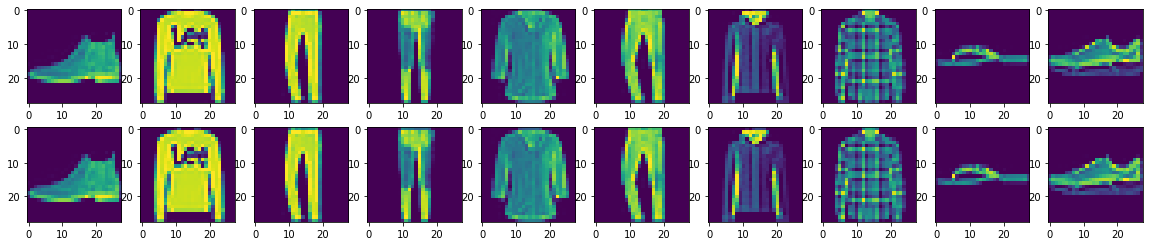

In [2]:
x = next(iter(test_db))
logits = model(tf.reshape(x, [-1,784]))

import matplotlib.pyplot as plt
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    a[0][i].imshow(np.reshape(x_test[i], (28, 28)))
    a[1][i].imshow(np.reshape(x[i], (28, 28)))
plt.show()